<a href="https://colab.research.google.com/github/uday-routhu/week5/blob/master/Project_2_Part_1_Core_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 2 - Part 1 (Core):

* Author: Udayakumar Routhu

###First choice: dataset 1


1. Source of data

2. Brief description of data

3. What is the target?

4. What does one row represent? (A person? A business? An event? A product?)

5. Is this a classification or regression problem?

6. How many features does the data have?

7. How many rows are in the dataset?

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?


In [74]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)

import missingno as msno
## Setting the max_columns to 50
pd.set_option('display.max_columns',50)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Classification Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

from sklearn import set_config
set_config(transform_output='pandas')

# Set global scikit-learn configuration
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram') # '

In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Define EDA Functions

###explore_categorical


In [3]:
# def explore_categorical_check_constant(df, x, fillna = True, placeholder = 'MISSING',
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """BEST VERSION"""
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()


  ## Save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100


  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)


  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)

  ## Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)

  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add. atitle with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = temp_df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]

  perc_most_common = freq / len(temp_df) * 100
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")

  return fig, ax

In [4]:
def plot_categorical_vs_target(df, x, y,figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # # Save null values before imputing
  # null_count = temp_df[x].isna().sum()
  # null_perc = null_count/len(df)* 100

  ## fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])


  ## Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)

  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
    # show fig and print
  plt.show()
  # print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

  return fig, ax

###explore_numeric

In [5]:
# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)

  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")

  return fig, axes

In [6]:
def plot_numeric_vs_target(df, x, y,figsize=(6,4),):
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  if null_count > 0:
    null_perc = null_count/len(df)* 100
    print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

  return fig, ax

### Load in the dataset

In [7]:
# Load the data set
fpath_adult = "/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week08/Data/adult.csv"
df_adult = pd.read_csv(fpath_adult)

In [8]:
df_adult.info()
df_adult.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Source of data
  The data can be downloaded from [this link](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset)

###Brief description of data
- An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

###What is the target?
- Income

###What does one row represent? (A person? A business? An event? A product?)
- A person

###Is this a classification or regression problem?
 - Since the goal is to predict whether an individual's income is above or below a threshold (categorical outcome), this is a classification problem.

###How many features does the data have?  
 - Number of attributes: 14
 - These are the demographics and other features to describe a person

###How many rows are in the dataset?
- Number of rows: 48842

###What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
 - we clean and explore the data before running the models

###CLean and Prepare The Data

###Identified and addressed missing values.

In [9]:
df_adult.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

* There are no null values to impute place holder

###Deleted duplicate rows.

In [10]:
#Explore Data
df_adult.duplicated().sum()

52

* There are 52 duplicated records in dataset

In [11]:
# drop duplicated record
df_adult = df_adult.drop_duplicates()

In [12]:
#again check duplicates dropped or not
df_adult.duplicated().sum()

0

* now, there are no duplicated rows

###Check for impossible numeric values/Delete unnecessary columns.

In [13]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  income           48790 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


* there is no data type missing

###Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).

In [14]:
data_types = df_adult.dtypes
str_cols = data_types[data_types=='object'].index
for col in str_cols:
    print(f'- {col}:')
    print(df_adult[col].value_counts(dropna=False))
    print("\n\n")
    print(df_adult[col])

- workclass:
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64



0             Private
1             Private
2           Local-gov
3             Private
4                   ?
             ...     
48837         Private
48838         Private
48839         Private
48840         Private
48841    Self-emp-inc
Name: workclass, Length: 48790, dtype: object
- education:
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64



0                11th
1           

* There is specail char '?' availble in 'relationship','workclass' column so removing that value

In [15]:
values_to_remove = ['?']
# Remove rows containing specified values in the 'year' column
df_adult = df_adult[~df_adult['relationship'].isin(values_to_remove)]
df_adult = df_adult[~df_adult['workclass'].isin(values_to_remove)]

In [16]:
data_types = df_adult.dtypes
str_cols = data_types[data_types=='object'].index
for col in str_cols:
    print(f'- {col}:')
    print(df_adult[col].value_counts(dropna=False))
    print("\n\n")
    print(df_adult[col])

- workclass:
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64



0             Private
1             Private
2           Local-gov
3             Private
5             Private
             ...     
48837         Private
48838         Private
48839         Private
48840         Private
48841    Self-emp-inc
Name: workclass, Length: 45995, dtype: object
- education:
HS-grad         14960
Some-college    10026
Bachelors        7761
Masters          2589
Assoc-voc        1977
11th             1634
Assoc-acdm       1529
10th             1241
7th-8th           844
Prof-school       810
9th               687
12th              597
Doctorate         576
5th-6th           466
1st-4th           227
Preschool          71
Name: education, dtype: int64



0                11th
1             HS-grad
2          Assoc

* Now , there are no inconsistency columns

###Check for and address any impossible values in numeric columns.

In [17]:
stats =  df_adult.describe()
stats.loc[['mean','min','max']]

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
mean,38.560822,1.898157e+05,10.129231,1115.253288,88.802652,40.950234
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


#####Outliers

* There are no impossible numeric values
* no extreme outliers are noted

In [18]:
df_adult.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,45995,45995,45995,45995,45995,45995,45995,45995,45995
unique,8,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33860,14960,21439,6165,18992,39407,31088,41266,34579


###Explore the data

#### Define EDA Functions

#####workclass

In [19]:
# Confirming the dtype to select correct EDA function
feature = "workclass"
df_adult[feature].dtype

dtype('O')

In [20]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45995 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45995 non-null  int64 
 1   workclass        45995 non-null  object
 2   fnlwgt           45995 non-null  int64 
 3   education        45995 non-null  object
 4   educational-num  45995 non-null  int64 
 5   marital-status   45995 non-null  object
 6   occupation       45995 non-null  object
 7   relationship     45995 non-null  object
 8   race             45995 non-null  object
 9   gender           45995 non-null  object
 10  capital-gain     45995 non-null  int64 
 11  capital-loss     45995 non-null  int64 
 12  hours-per-week   45995 non-null  int64 
 13  native-country   45995 non-null  object
 14  income           45995 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


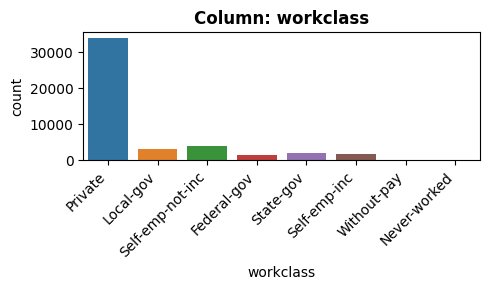

- NaN's Found: 0 (0.0%)
- Unique Values: 8
- Most common value: 'Private' occurs 33860 times (73.62%)


In [21]:
# Testing function
fig, ax = explore_categorical(df_adult, "workclass", figsize=(5,3))

Observations

1. What type of feature is it? (Nominal category, ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.

3. Is the feature constant or quasi-constant?
  - No, the most common category makes up only 73.62% of the feature.

4. What is the cardinality? Is it high?
  - There are 8 categories. Not high cardinality ( < 10 categories)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


####education

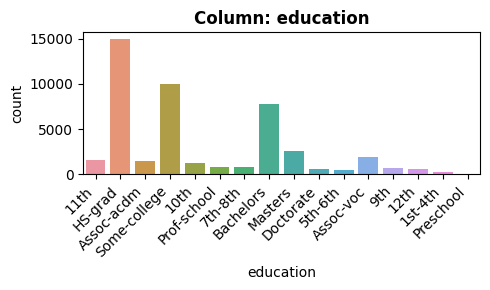

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'HS-grad' occurs 14960 times (32.53%)


In [22]:
# Testing function
fig, ax = explore_categorical(df_adult, "education", figsize=(5,3))

Observations

1. What type of feature is it? (Nominal category, ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.

3. Is the feature constant or quasi-constant?
  - No, the most common category makes up only 32.53% of the feature.

4. What is the cardinality? Is it high?
  - There are 16 categories. high cardinality ( > 10 categories)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

####marital-status

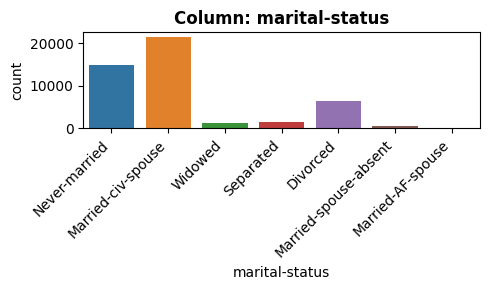

- NaN's Found: 0 (0.0%)
- Unique Values: 7
- Most common value: 'Married-civ-spouse' occurs 21439 times (46.61%)


In [23]:
# Testing function
fig, ax = explore_categorical(df_adult, "marital-status", figsize=(5,3))

Observations

1. What type of feature is it? (Nominal category, ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.

3. Is the feature constant or quasi-constant?
  - No, the most common category makes up only 46.61% of the feature.

4. What is the cardinality? Is it high?
  - There are 7 categories.No high cardinality ( < 10 categories)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

####occupation

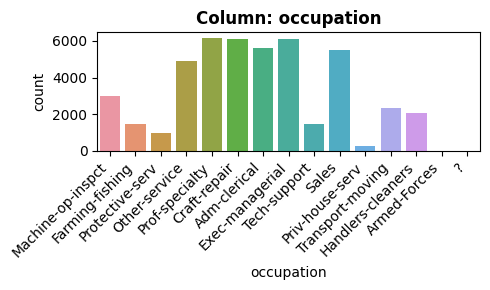

- NaN's Found: 0 (0.0%)
- Unique Values: 15
- Most common value: 'Prof-specialty' occurs 6165 times (13.4%)


In [24]:
# Testing function
fig, ax = explore_categorical(df_adult, "occupation", figsize=(5,3))

Observations

1. What type of feature is it? (Nominal category, ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.

3. Is the feature constant or quasi-constant?
  - No, the most common category makes up only 46.61% of the feature.

4. What is the cardinality? Is it high?
  - There are 15 categories.No high cardinality ( > 10 categories)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

####relationship

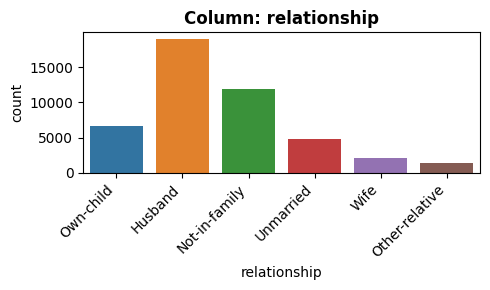

- NaN's Found: 0 (0.0%)
- Unique Values: 6
- Most common value: 'Husband' occurs 18992 times (41.29%)


In [25]:
# Testing function
fig, ax = explore_categorical(df_adult, "relationship", figsize=(5,3))

Observations

1. What type of feature is it? (Nominal category, ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.

3. Is the feature constant or quasi-constant?
  - No, the most common category makes up only 41.29% of the feature.

4. What is the cardinality? Is it high?
  - There are 6 categories.No high cardinality ( < 10 categories)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

####race

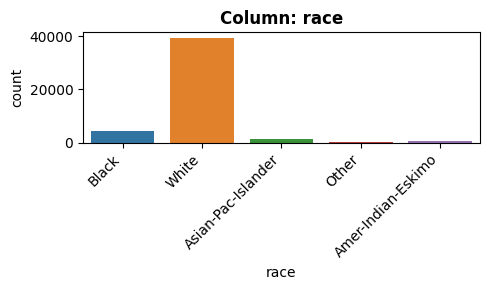

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'White' occurs 39407 times (85.68%)


In [26]:
# Testing function
fig, ax = explore_categorical(df_adult, "race", figsize=(5,3))

Observations

1. What type of feature is it? (Nominal category, ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.

3. Is the feature constant or quasi-constant?
  - No, the most common category makes up only 85.68% of the feature.

4. What is the cardinality? Is it high?
  - There are 5 categories.No high cardinality ( > 10 categories)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

####gender

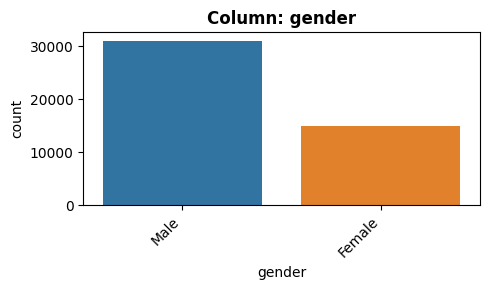

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Male' occurs 31088 times (67.59%)


In [27]:
# Testing function
fig, ax = explore_categorical(df_adult, "gender", figsize=(5,3))

Observations

1. What type of feature is it? (Nominal category, ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.

3. Is the feature constant or quasi-constant?
  - No, the most common category makes up only 67.59% of the feature.

4. What is the cardinality? Is it high?
  - There are 2 categories.No high cardinality ( > 10 categories)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

###Numeric

####age

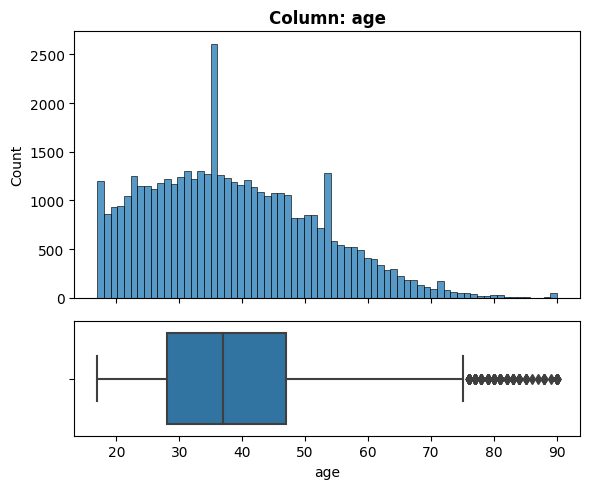

- NaN's Found: 0 (0.0%)
- Unique Values: 74
- Most common value: '36' occurs 1312 times (2.85%)


In [28]:
# Testing the function
explore_numeric(df_adult, "age");

**Observations:**

1. What type of feature is it? (categorical (nominal), ordinal, numeric?)
  - Numeric.

2. How many null values? What percentage? What will you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.
3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Numeric feature, so not a concern.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

<ipython-input-4-ed3356a63aad>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


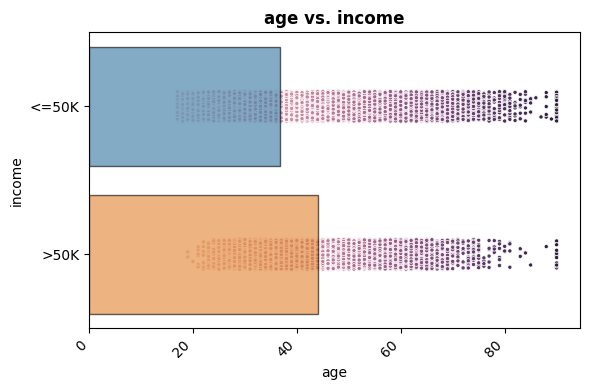

In [29]:
# Testing function
fig, ax = plot_categorical_vs_target(df_adult, 'age','income')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes, but there are some outleirs that may be affecting the overall trendline.

###fnlwgt

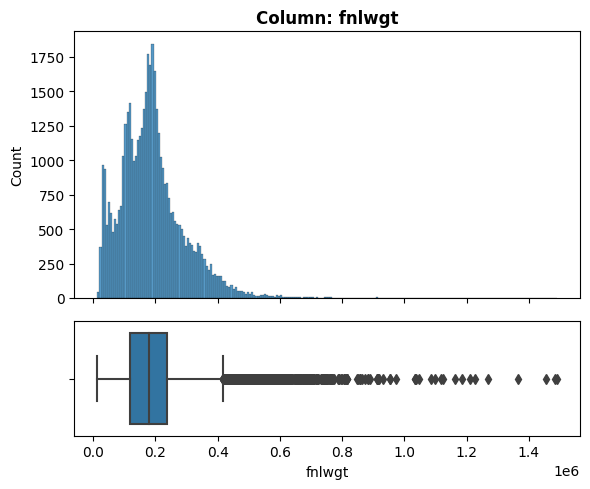

- NaN's Found: 0 (0.0%)
- Unique Values: 27039
- Most common value: '203488' occurs 21 times (0.05%)


In [30]:
# Testing the function
explore_numeric(df_adult, "fnlwgt");

**Observations:**

1. What type of feature is it? (categorical (nominal), ordinal, numeric?)
  - Numeric.

2. How many null values? What percentage? What will you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.
3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Numeric feature, so not a concern.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

<ipython-input-4-ed3356a63aad>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


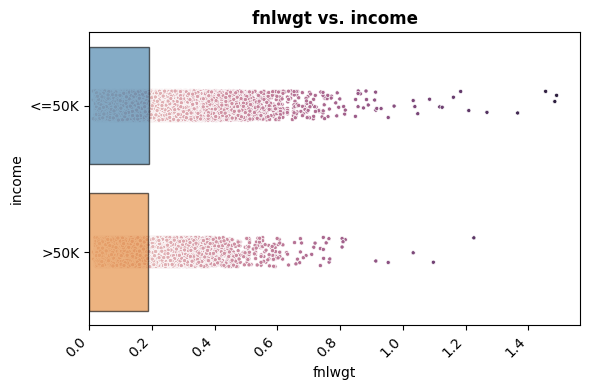

In [31]:
# Testing function
fig, ax = plot_categorical_vs_target(df_adult, 'fnlwgt','income')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes, but there are some outleirs that may be affecting the overall trendline.

###educational-num

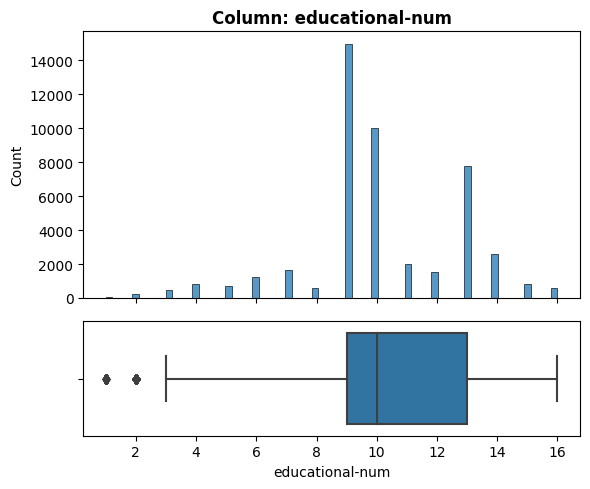

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: '9' occurs 14960 times (32.53%)


In [32]:
# Testing the function
explore_numeric(df_adult, "educational-num");

**Observations:**

1. What type of feature is it? (categorical (nominal), ordinal, numeric?)
  - Numeric.

2. How many null values? What percentage? What will you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.
3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Numeric feature, so not a concern.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

<ipython-input-4-ed3356a63aad>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


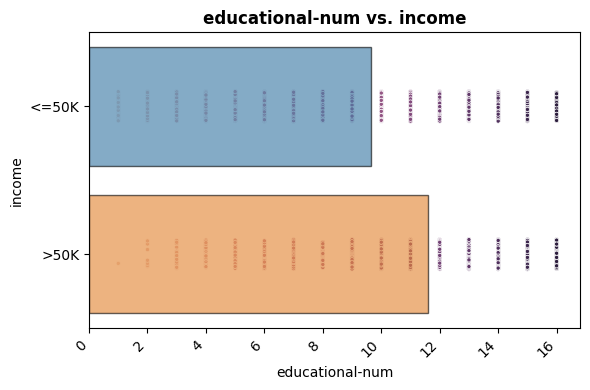

In [33]:
# Testing function
fig, ax = plot_categorical_vs_target(df_adult, 'educational-num','income')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes, but there are some outleirs that may be affecting the overall trendline.

###capital-gain

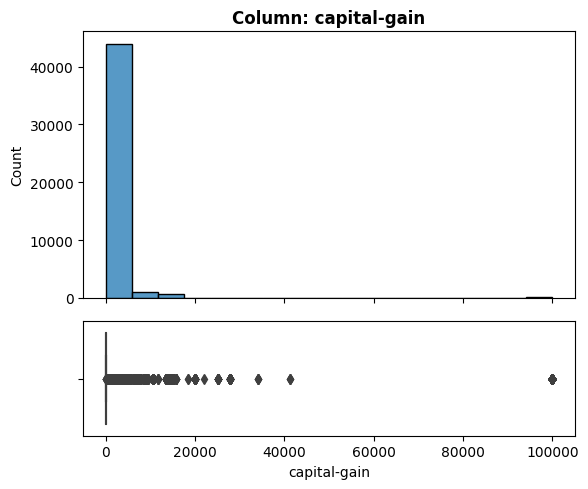

- NaN's Found: 0 (0.0%)
- Unique Values: 121
- Most common value: '0' occurs 42134 times (91.61%)


In [34]:
# Testing the function
explore_numeric(df_adult, "capital-gain");

**Observations:**

1. What type of feature is it? (categorical (nominal), ordinal, numeric?)
  - Numeric.

2. How many null values? What percentage? What will you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.
3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Numeric feature, so not a concern.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

<ipython-input-4-ed3356a63aad>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


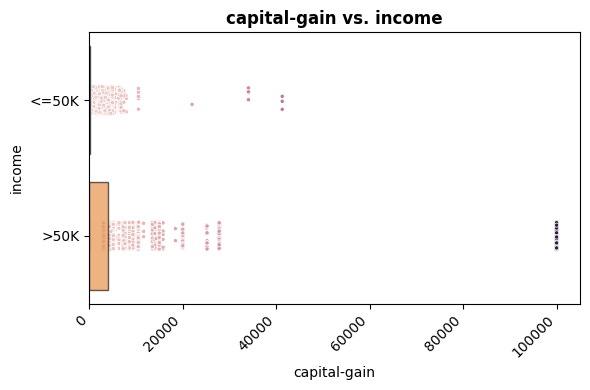

In [35]:
# Testing function
fig, ax = plot_categorical_vs_target(df_adult, 'capital-gain','income')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes, but there are some outleirs that may be affecting the overall trendline.

###capital-loss

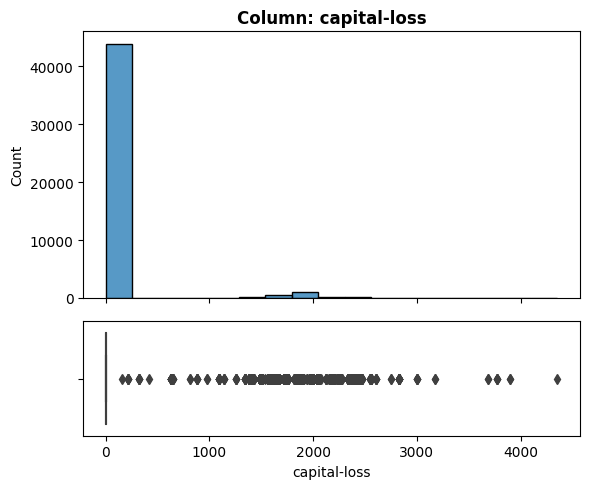

- NaN's Found: 0 (0.0%)
- Unique Values: 97
- Most common value: '0' occurs 43814 times (95.26%)


In [36]:
# Testing the function
explore_numeric(df_adult, "capital-loss");

**Observations:**

1. What type of feature is it? (categorical (nominal), ordinal, numeric?)
  - Numeric.

2. How many null values? What percentage? What will you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.
3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Numeric feature, so not a concern.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

<ipython-input-4-ed3356a63aad>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


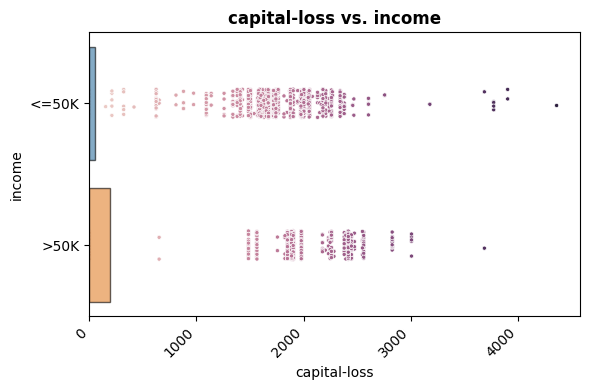

In [37]:
# Testing function
fig, ax = plot_categorical_vs_target(df_adult, 'capital-loss','income')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes, but there are some outleirs that may be affecting the overall trendline.

###hours-per-week

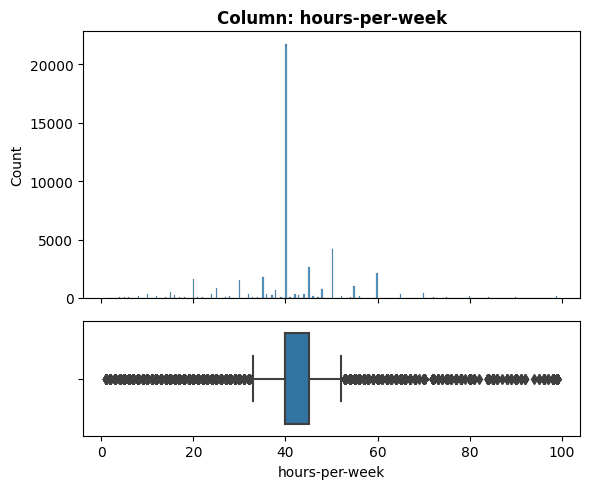

- NaN's Found: 0 (0.0%)
- Unique Values: 96
- Most common value: '40' occurs 21743 times (47.27%)


In [38]:
# Testing the function
explore_numeric(df_adult, "hours-per-week");

**Observations:**

1. What type of feature is it? (categorical (nominal), ordinal, numeric?)
  - Numeric.

2. How many null values? What percentage? What will you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.
3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Numeric feature, so not a concern.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

<ipython-input-4-ed3356a63aad>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


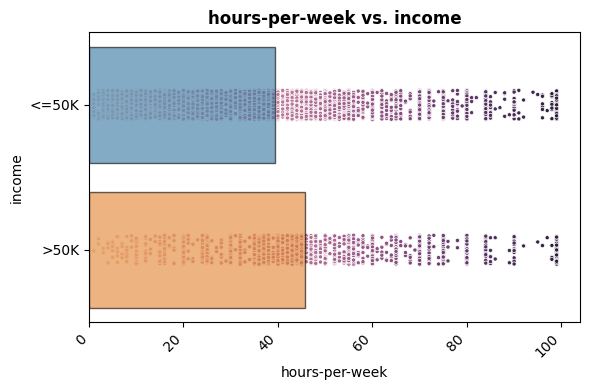

In [39]:
# Testing function
fig, ax = plot_categorical_vs_target(df_adult, 'hours-per-week','income')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes, but there are some outleirs that may be affecting the overall trendline.

####Produced univariate visuals for the target and all features.

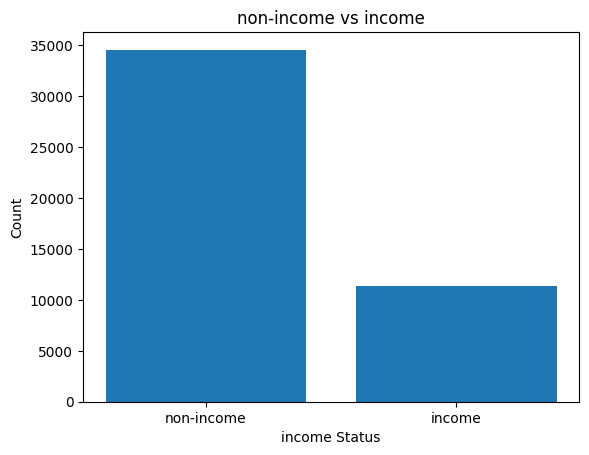

In [40]:
#Plot the counts for the number of adults who has income vs not having income.
fig, ax = plt.subplots()

survived_counts = df_adult['income'].value_counts()
plt.bar(['non-income', 'income'], survived_counts)
#plt.bar(['Died', 'Survived'], survived_counts)

# Set x-label, y-label, and title
plt.xlabel('income Status')
plt.ylabel('Count')
plt.title('non-income vs income')

# Display the plot
plt.show()

Text(0, 0.5, 'Number age group')

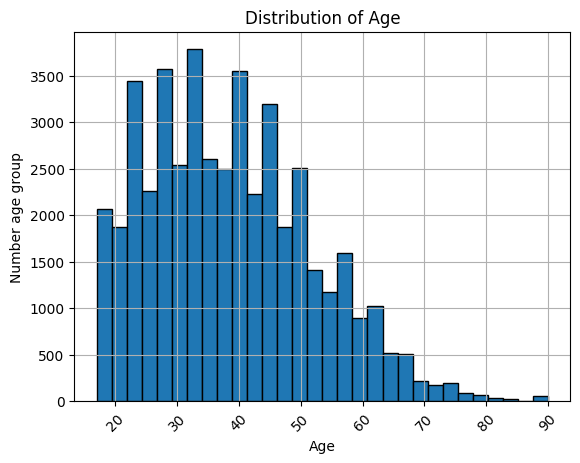

In [41]:
#Plot a histogram of the distribution of Age.
ax = df_adult['age'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Age')
ax.set_xlabel('Age')
ax.set_ylabel('Number age group')

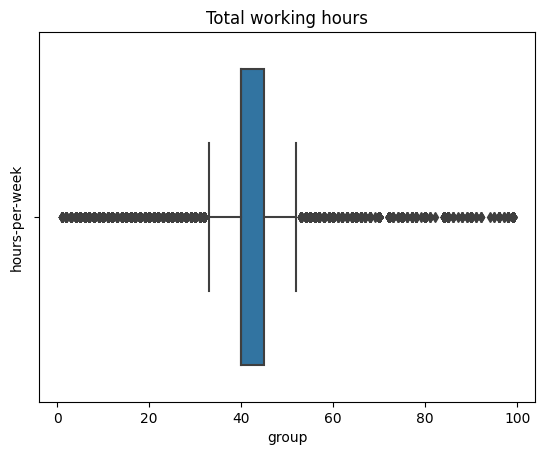

In [42]:
# Create the boxplot
ax = sns.boxplot(data=df_adult,x="hours-per-week")
ax.set_xlabel("group");
ax.set_ylabel("hours-per-week");
ax.set_title("Total working hours");

####choose two visualizations from your analysis

####histogram

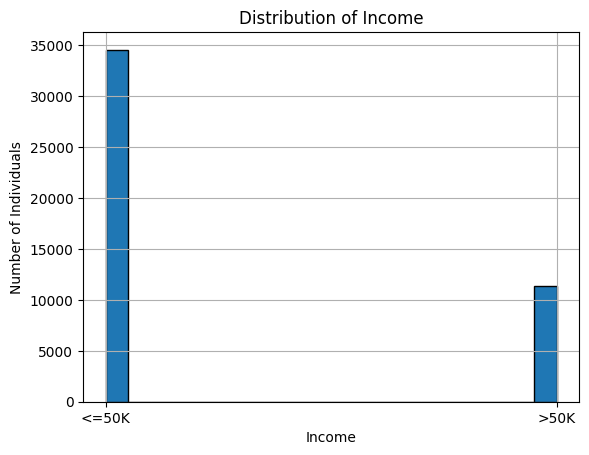

In [43]:
# Create the histogram
ax = df_adult['income'].hist(bins =20, edgecolor = 'black')
ax.set_title('Distribution of Income')
ax.set_xlabel('Income')
ax.set_ylabel('Number of Individuals');

- Individuals with significant capital gains could be a potential target for higher-income financial products.
- They might consider targeting individuals in the age range where the probability of earning >50K is higher, or focus on promoting higher education to improve the chances of higher income.

####boxplot

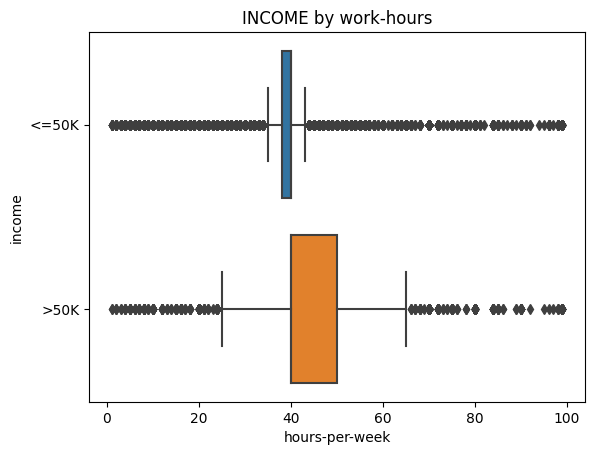

In [44]:
# Create the boxplot
ax = sns.boxplot(x = 'hours-per-week', y = 'income', data = df_adult)
ax.set_title('INCOME by work-hours');

- Individuals earning >50K tend to work slightly more hours per week on average compared to those earning <=50K. The distribution of hours worked per week is more spread out for the >50K group.

####Plot a corrleation

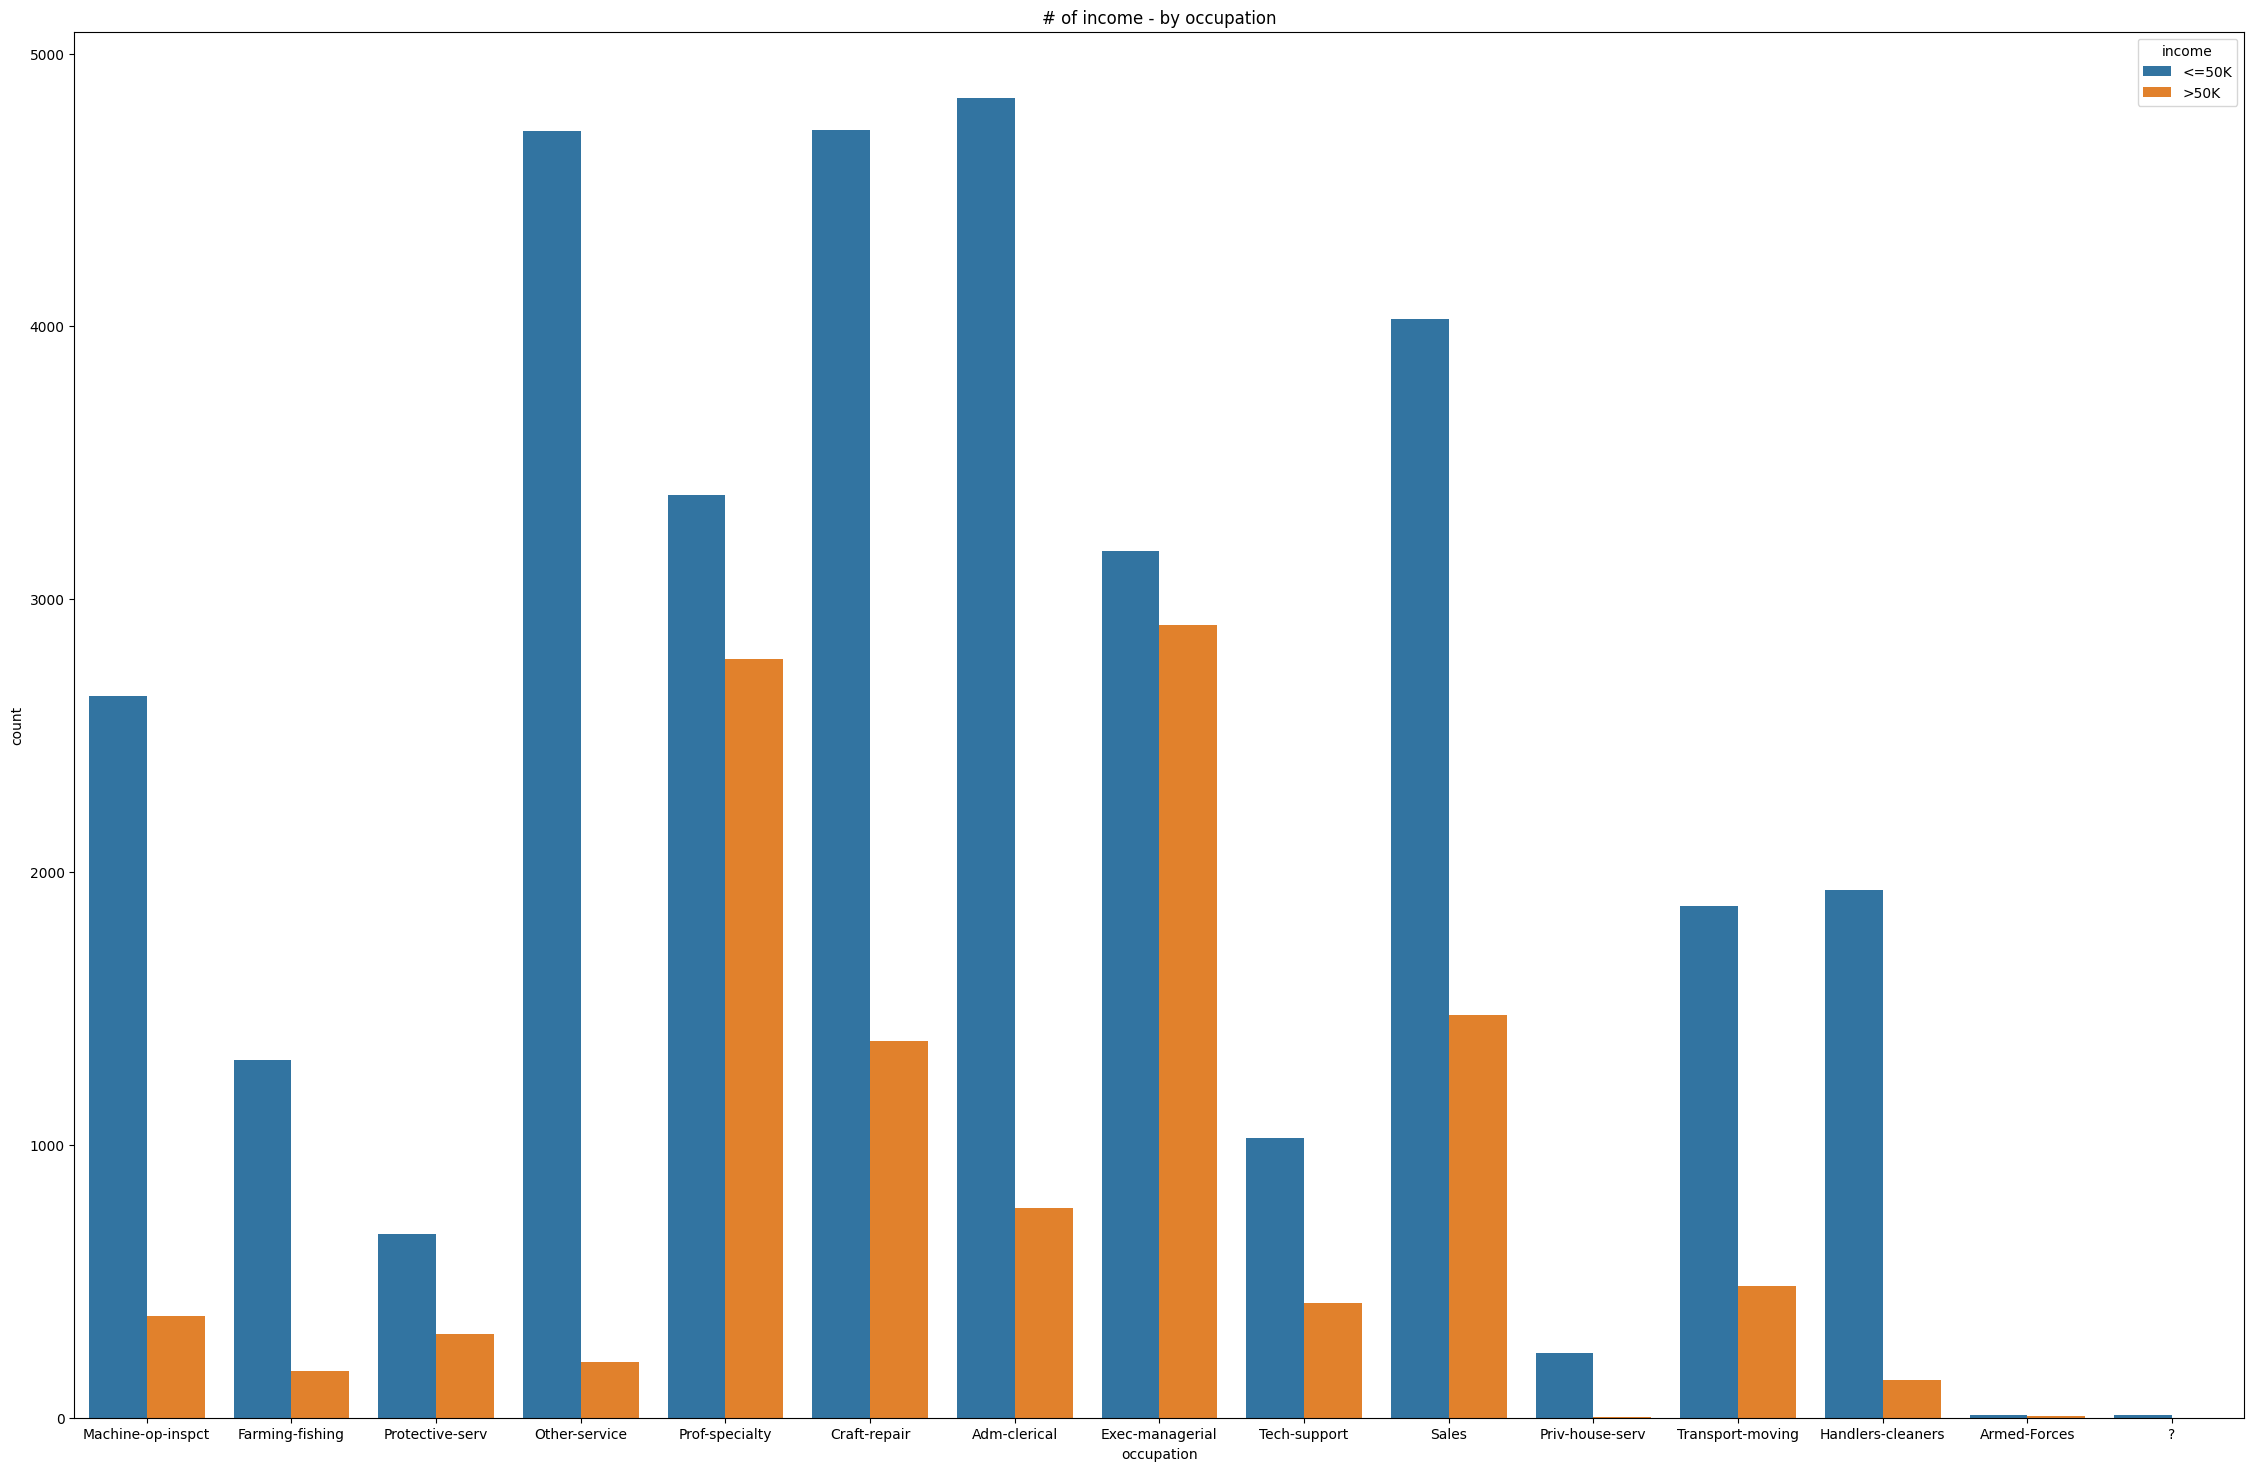

In [45]:
plt.figure(figsize=(28, 18))
ax = sns.countplot(data=df_adult, hue='income', x='occupation');
ax.set(title='# of income - by occupation');

- Individuals with higher educational-num tend to have a higher likelihood of earning >50K. The distribution of educational-num is shifted to the right for individuals earning >50K, indicating a higher educational level.

#### Multivariate Visual

#### 1) Plot the counts for the number of income by Sex

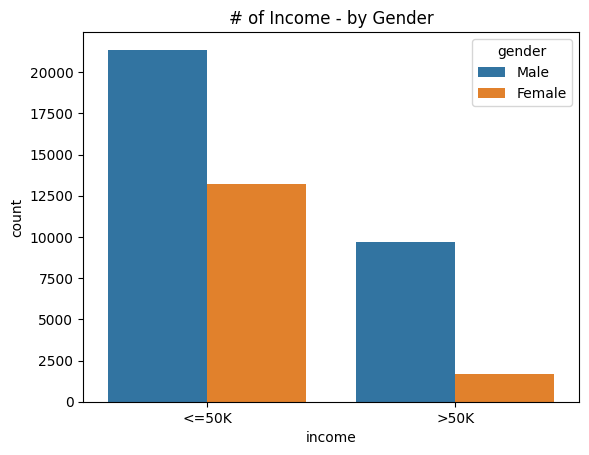

In [58]:
ax = sns.countplot(data=df_adult, hue='gender', x='income');
ax.set(title='# of Income - by Gender');

​Question: Which group had a higher income ?
- Answer: Male has higher income.

### 2) Plot a barplot of the average

In [56]:
## functionize a barplot and call it plot_bar

def plot_bar(data,x, y, figsize=(20,5)):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot barplot

    ## counts, counts up the categories, sort the values, then puts them in a
    ## data frame.

    counts = df_adult[x].value_counts().sort_values(ascending=False).to_frame()
    ## ploting the barplot

    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)

    plt.xticks(rotation= 90)
    ax.set_title(f'Categorical Frequencies of {y}', fontsize = 20, fontweight = 'bold');
    ax.set_xlabel(f'Categories for {y}', fontsize = 15, fontweight = 'bold')
    ax.set_ylabel('Counts', fontsize = 15, fontweight = 'bold')

    return fig,ax

<=50K    34579
>50K     11416
Name: income, dtype: int64


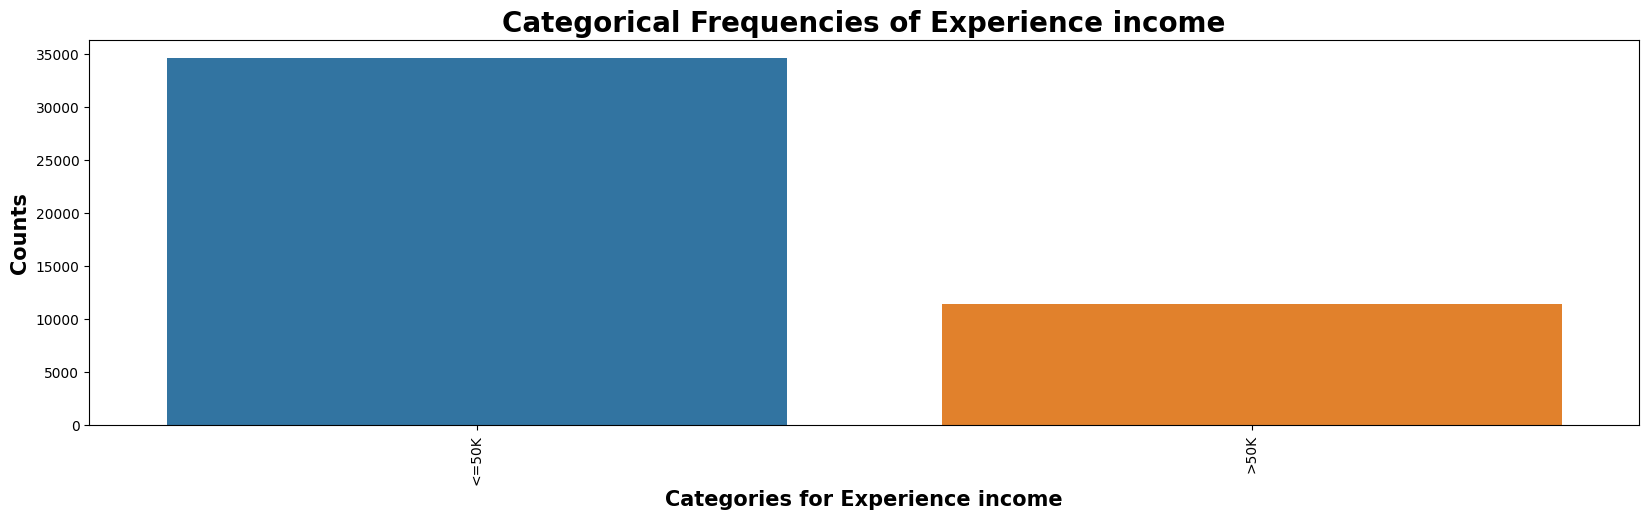

In [57]:
fig, ax = plot_bar(df_adult, 'income', 'Experience income');
print(df_adult['income'].value_counts())

- Majority of people got <=50k income  

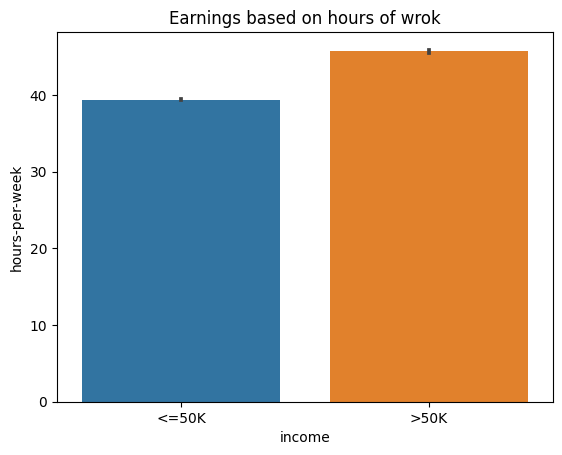

In [48]:
ax = sns.barplot(data=df_adult,x='income', y='hours-per-week')
ax.set_title("Earnings based on hours of wrok");


- people who worked more than 40 hours, got higher salary  

### 3) Plot a corrleation heatmap of all of the numeric columns.

[Text(0.5, 1.0, 'Correlation Heatmap')]

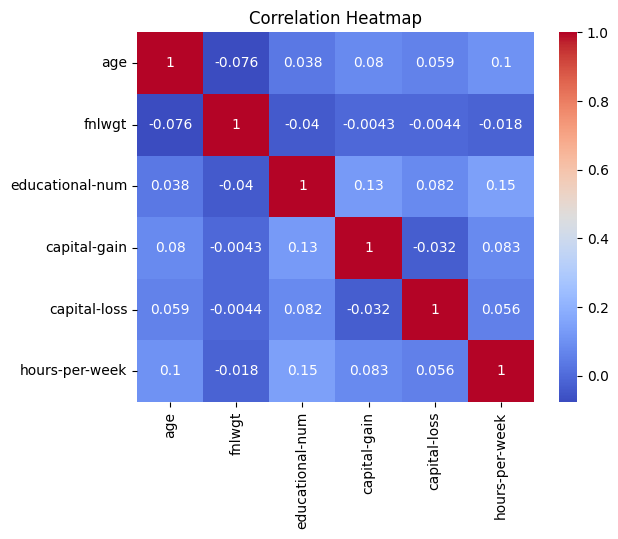

In [49]:
corr = df_adult.corr(numeric_only=True)
ax = sns.heatmap(corr,annot=True, cmap='coolwarm');
ax.set(title='Correlation Heatmap')

Question: which column had the highest positive correlation to the "Income" column?
- Answer: the income column was most positively correlated with the hours-per-week column.

###Modeling

### **Check Class Balance**

In [60]:
df_adult['income'].value_counts(normalize = False)

<=50K    34579
>50K     11416
Name: income, dtype: int64

In [61]:
# Check how many samples of each class are present
df_adult['income'].value_counts(normalize=True)

<=50K    0.751799
>50K     0.248201
Name: income, dtype: float64

### **Split the Data**

In [62]:
# Define X and y
target = 'income'
X = df_adult.drop(columns = [target]).copy()
y = df_adult[target]

In [63]:
# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


#### Class Balance

In [64]:
# Check how many samples of each class are present for train
y_train.value_counts(normalize=True)

<=50K    0.752783
>50K     0.247217
Name: income, dtype: float64

### **Transformers**

In [65]:
# Categorical Preprocessing Pipeline
# Save list of column names
ohe_cols = X_train.select_dtypes('object').columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "Missing")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
# Numerical Preprocessing Pipeline
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
# Create the Column Transformer
preprocessor = ColumnTransformer([num_tuple, ohe_tuple],
                                 verbose_feature_names_out=False)

OneHotEncoder Columns: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')
Numeric Columns: Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


#### Evaluation Functions

In [66]:
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict

def evaluate_classification(model, X_train, y_train, X_test, y_test,
                            figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                         output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                         label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                        output_dict=True,figsize=figsize,
                                        colorbar=colorbar, cmap=cmap_test,
                                        label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

####Model - 1

- DecisionTreeClassifier

In [67]:
# Create an instance of the model
dtc = DecisionTreeClassifier(random_state=42)
# Create a model pipeline
clf_pipe = make_pipeline(preprocessor, dtc)
# Fit the model
clf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImpute...ll_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [68]:
clf_pipe.predict(X_train)


array(['>50K', '<=50K', '<=50K', ..., '<=50K', '>50K', '<=50K'],
      dtype=object)

In [69]:
y_train

25322     >50K
37103    <=50K
24585    <=50K
48017    <=50K
1886     <=50K
         ...  
11988    <=50K
47491    <=50K
40512    <=50K
914       >50K
16795    <=50K
Name: income, Length: 34496, dtype: object

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     25968
        >50K       1.00      1.00      1.00      8528

    accuracy                           1.00     34496
   macro avg       1.00      1.00      1.00     34496
weighted avg       1.00      1.00      1.00     34496



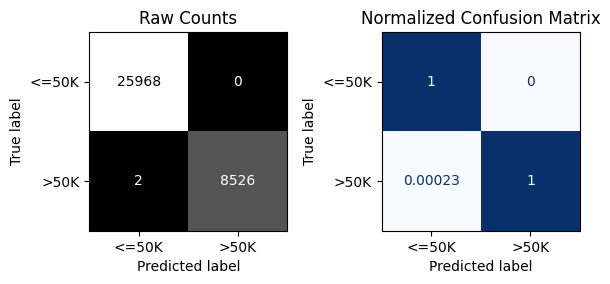


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.88      8611
        >50K       0.63      0.63      0.63      2888

    accuracy                           0.81     11499
   macro avg       0.75      0.75      0.75     11499
weighted avg       0.81      0.81      0.81     11499



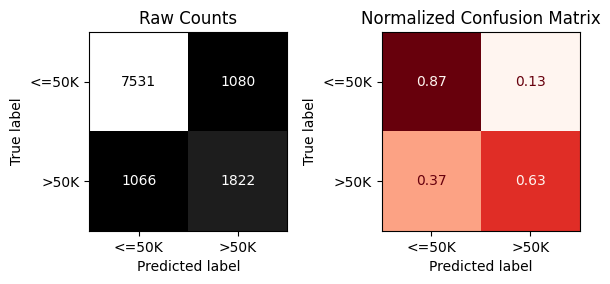

In [70]:
## Evaluate the model
evaluate_classification(clf_pipe, X_train, y_train, X_test, y_test)

- The model appears to be performing very well on the training data with perfect precision, recall, and F1-score.
- However, on the test data, the performance is slightly lower, indicating that the model might be overfitting to the training data.

###Using GridSearch CV

In [71]:
# Define the parameter grid to search
param_grid = {
    'decisiontreeclassifier__max_depth': [None, 10, 20],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4]
}

In [72]:
# Create GridSearchCV instance
grid_search = GridSearchCV(clf_pipe, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_


----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91     25968
        >50K       0.76      0.66      0.71      8528

    accuracy                           0.87     34496
   macro avg       0.83      0.80      0.81     34496
weighted avg       0.86      0.87      0.86     34496



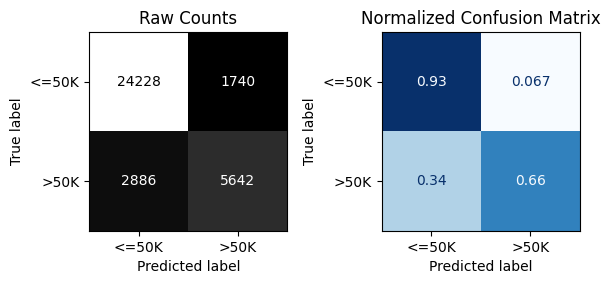


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      8611
        >50K       0.73      0.64      0.68      2888

    accuracy                           0.85     11499
   macro avg       0.81      0.78      0.79     11499
weighted avg       0.85      0.85      0.85     11499



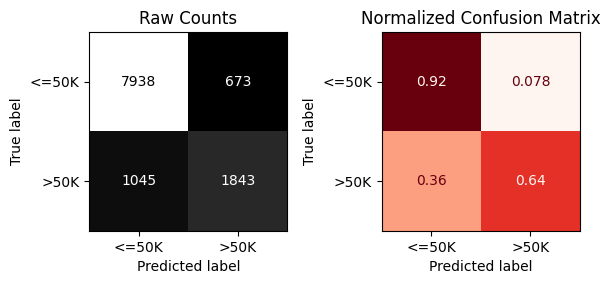

In [73]:
# Evalaute the best model
best_logreg = grid_search.best_estimator_
evaluate_classification(best_logreg, X_train, y_train, X_test, y_test)

- Applying GridSearchCV has led to improvements in the model's performance on both the training and test data. The model now achieves higher precision, recall, and F1-score for both classes.
- The accuracy has also improved, indicating that the model's generalization capability has improved as well.

#### Using PCA

In [87]:
# Create a transformer pipeline
transformer_pca_dcn = make_pipeline(preprocessor, PCA(n_components=7))

In [89]:
# Create a modeling pipeline
dtc_pipe_pca = make_pipeline(transformer_pca_dcn, dtc)
dtc_pipe_pca.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('numeric',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                                                  ('categorical',
                                                                   Pipeline(steps=[(...
                                                                                                  strategy='constant')),
                                                                                   ('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse_output=False))]),
                                                                   Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object'))],
                                                    verbose_feature_names_out=False)),
                                 ('pca', PCA(n_components=7))])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [90]:
dtc_pipe_pca.predict(X_train)

array(['>50K', '<=50K', '<=50K', ..., '<=50K', '>50K', '<=50K'],
      dtype=object)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     25968
        >50K       1.00      1.00      1.00      8528

    accuracy                           1.00     34496
   macro avg       1.00      1.00      1.00     34496
weighted avg       1.00      1.00      1.00     34496



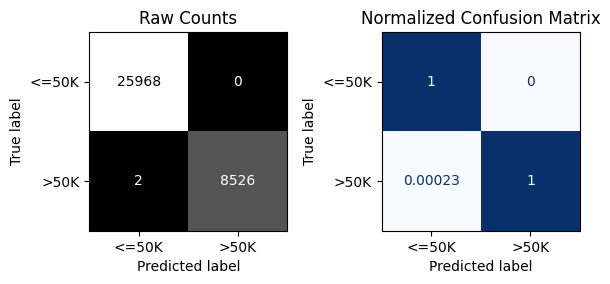


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.86      0.85      0.86      8611
        >50K       0.57      0.58      0.57      2888

    accuracy                           0.78     11499
   macro avg       0.71      0.72      0.71     11499
weighted avg       0.79      0.78      0.78     11499



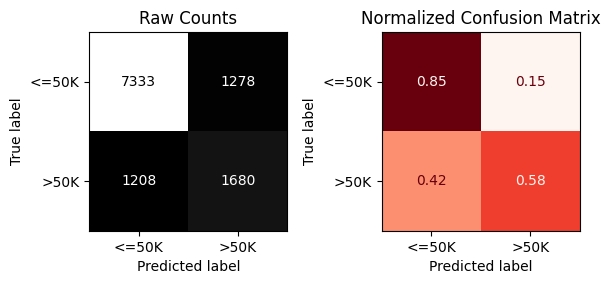

In [91]:
## Evaluate the model
evaluate_classification(dtc_pipe_pca, X_train, y_train, X_test, y_test)

- Using PCA with a DecisionTreeClassifier has resulted in a model with perfect performance on the training data, as indicated by precision, recall, and F1-score values of 1.00 for both classes.
- This suggests that the model has potentially overfit the training data, given the perfect scores.
- However, the model's performance on the test data is not as strong. While the model is still accurate, the precision, recall, and F1-score values for the '>50K' class are lower than those for the '<=50K' class.
- This indicates that the model's ability to predict the '>50K' class is not as reliable as its ability to predict the '<=50K' class

### Model -2

- Logistic Regression

In [81]:
# Make an instance of the model with default parameters
logreg = LogisticRegression(max_iter=500, random_state=42)
# Put scaler and model in a pipeline
logreg_pipe = make_pipeline(preprocessor, logreg)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImpute...lue='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logisticregression',
                 LogisticRegression(max_iter=500, random_state=42))])

In [ ]:
logreg_pipe.predict(X_train)

array(['>50K', '<=50K', '<=50K', ..., '<=50K', '>50K', '<=50K'],
      dtype=object)

In [ ]:
y_train

25322     >50K
37103    <=50K
24585    <=50K
48017    <=50K
1886     <=50K
         ...  
11988    <=50K
47491    <=50K
40512    <=50K
914       >50K
16795    <=50K
Name: income, Length: 34496, dtype: object

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90     25968
        >50K       0.74      0.61      0.67      8528

    accuracy                           0.85     34496
   macro avg       0.81      0.77      0.79     34496
weighted avg       0.84      0.85      0.84     34496



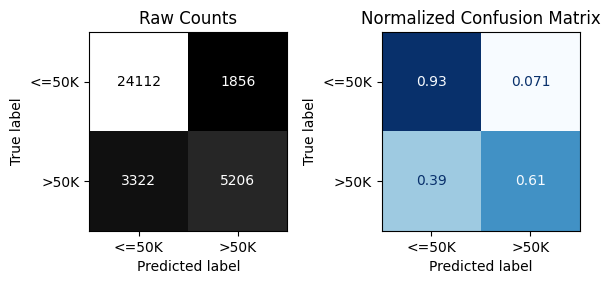


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      8611
        >50K       0.74      0.61      0.67      2888

    accuracy                           0.85     11499
   macro avg       0.81      0.77      0.78     11499
weighted avg       0.84      0.85      0.84     11499



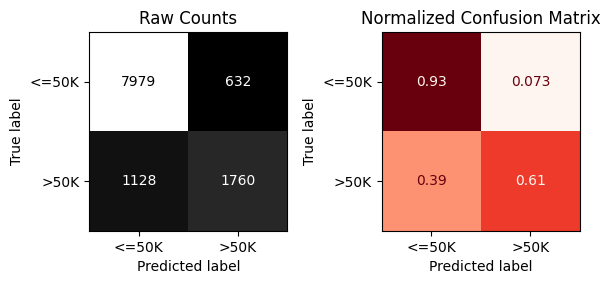

In [ ]:
## Evaluate the model
evaluate_classification(logreg_pipe, X_train, y_train, X_test, y_test)

- The Logistic Regression model seems to be performing consistently on both the training and test data.
- The precision, recall, and F1-score values for both classes are similar between the training and test sets, indicating that the model's performance is stable across different data subsets.

### Using GridSearch CV

In [ ]:
# Making a logreg pipe that uses L2 regularization
logreg_pipe = make_pipeline(preprocessor, LogisticRegression(solver='liblinear',
                                                       max_iter=500,
                                                       penalty='l2',
                                                       random_state=42))
# Define the params and instantiate gridsearch
l2_params = {'logisticregression__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                            'newton-cholesky', 'sag', 'saga'],
                  'logisticregression__penalty' : ['l2'],
                  'logisticregression__C': [0.0001, 0.001, 0.01, 0.1,
                                            1, 10, 100, 1000,10000] }
gs = GridSearchCV(logreg_pipe, l2_params,verbose=True, n_jobs=-1,
                  return_train_score=True,scoring='recall_macro')
# Fit gridsearch and display best params
gs.fit(X_train, y_train)
gs.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


{'logisticregression__C': 1,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90     25968
        >50K       0.74      0.61      0.67      8528

    accuracy                           0.85     34496
   macro avg       0.81      0.77      0.79     34496
weighted avg       0.84      0.85      0.84     34496



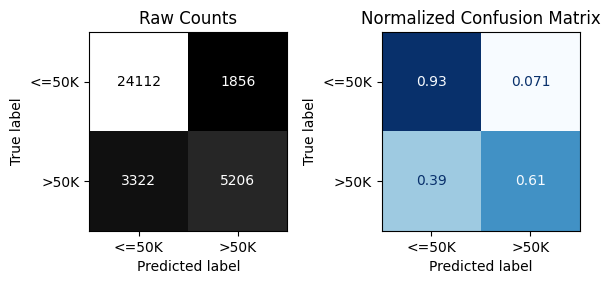


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      8611
        >50K       0.74      0.61      0.67      2888

    accuracy                           0.85     11499
   macro avg       0.81      0.77      0.78     11499
weighted avg       0.84      0.85      0.84     11499



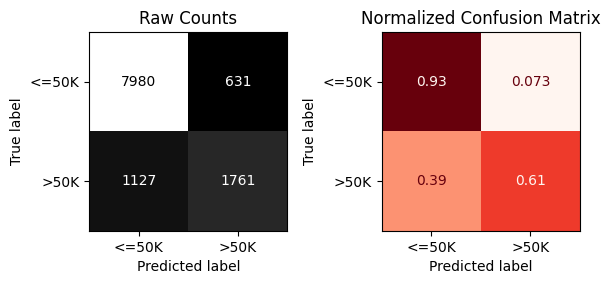

In [ ]:
# Evalaute the best model
best_logreg = gs.best_estimator_
evaluate_classification(best_logreg, X_train, y_train, X_test, y_test)

- The precision, recall, and F1-score values are similar between the two datasets, indicating that the model is not overfitting.
- An accuracy of 0.85 suggests that the model's predictions are relatively accurate, though there's a trade-off between precision and recall, particularly for the '>50K' class.

####Create a PCA Pipeline with Regression

In [83]:
# Create a transformer pipeline
transformer_pca = make_pipeline(preprocessor, PCA(n_components=7))

In [84]:
# Create a modeling pipeline
logreg_pipe_pca = make_pipeline(transformer_pca, logreg)
logreg_pipe_pca.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('numeric',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                                                  ('categorical',
                                                                   Pipeline(steps=[(...
                                                                                                  strategy='constant')),
                                                                                   ('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse_output=False))]),
                                                                   Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object'))],
                                                    verbose_feature_names_out=False)),
                                 ('pca', PCA(n_components=7))])),
                ('logisticregression',
                 LogisticRegression(max_iter=500, random_state=42))])

In [85]:
logreg_pipe_pca.predict(X_train)

array(['>50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89     25968
        >50K       0.72      0.54      0.62      8528

    accuracy                           0.83     34496
   macro avg       0.79      0.74      0.76     34496
weighted avg       0.83      0.83      0.83     34496



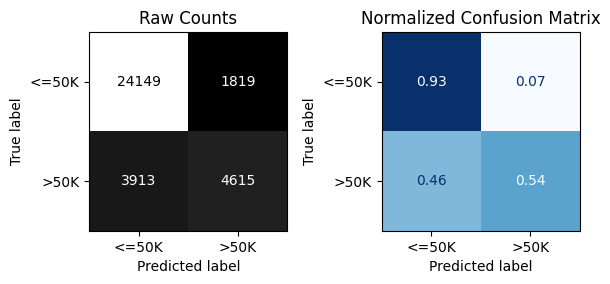


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.90      8611
        >50K       0.74      0.55      0.63      2888

    accuracy                           0.84     11499
   macro avg       0.80      0.74      0.76     11499
weighted avg       0.83      0.84      0.83     11499



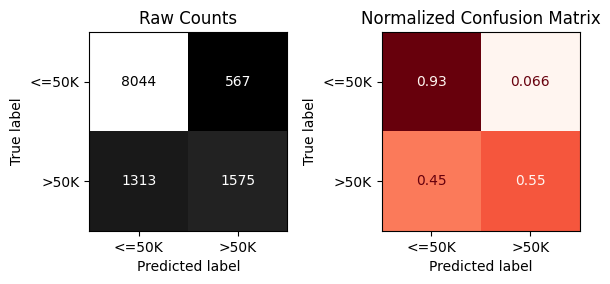

In [86]:
## Evaluate the model
evaluate_classification(logreg_pipe_pca, X_train, y_train, X_test, y_test)

- The use of PCA along with Regression has resulted in a model with slightly lower accuracy compared to the previous models.
- The precision, recall, and F1-score values are consistent across training and test datasets, indicating that the model generalizes well to new data.
- The model seems to be better at predicting the '<=50K' class, as indicated by higher precision and recall values for that class.
-  However, the model's performance on the '>50K' class is relatively weaker, with lower precision and recall.

#### Choose your "production" model and justify this decision using the metrics most important to your business problem.

1. DecisionTreeClassifier:

   - Training Data Accuracy: 100%
   - Test Data Accuracy: 81%

2. GridSearchCV (with DecisionTreeClassifier):
   - Training Data Accuracy: 87%
   - Test Data Accuracy: 85%

3. PCA with DecisionTreeClassifier:
  - Training Data Accuracy: 100%
  - Test Data Accuracy: 78%

4. LogisticRegression:

  - Training Data Accuracy: 85%
  - Test Data Accuracy: 85%

5. PCA (with Regression):
  - Training Data Accuracy: 83%
  - Test Data Accuracy: 84%

- Based on the accuracy scores, the DecisionTreeClassifier achieves the highest accuracy on the training data, but it has the lowest accuracy on the test data, suggesting potential overfitting.
- The PCA with DecisionTreeClassifier also shows signs of overfitting, as it performs perfectly on the training data but significantly worse on the test data.
- Among the remaining models, both the GridSearchCV model with DecisionTreeClassifier and the LogisticRegression model have similar accuracy scores on both the training and test data. These two models generalize well and have a balance between precision and recall for both classes.

#### which model ?

- Given that the primary business goal is likely to have a model that generalizes well to new, unseen data, the production model choice should be based on the balance between performance on the test data and avoiding overfitting. In this case, the LogisticRegression model would be a suitable choice for production.